# Performance Evaluation Microbenchmarks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('minimal_ecall/measurement_minimal_ecall.tsv', delimiter='\t')
data = data.append(pd.read_csv('minimal_startup/measurement_minimal_startup.tsv', delimiter='\t'))
data = data.append(pd.read_csv('gcd/measurement_gcd.tsv', delimiter='\t'))

data.drop(columns='Unnamed: 0', inplace=True)
data.sort_values(['program', 'operation', 'enclaved'], inplace=True)

data

,cmd,descr,duration,enclaved,operation,program,time,size
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,5850.656986,False,debug,build gcd,2021-08-21 12:40:25.613264,NaN
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,6655.079842,False,"debug, codegen-units=1",build gcd,2021-08-21 12:40:32.272489,NaN
4,"['make', 'all']",Time spent building the program in debug mode,45702.375174,True,"debug, codegen-units=1",build gcd,2021-08-21 12:41:52.116931,NaN
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,15734.180927,False,release,build gcd,2021-08-21 12:40:48.010422,NaN
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,18360.224247,False,"release, codegen-units=1",build gcd,2021-08-21 12:41:06.373059,NaN
...,...,...,...,...,...,...,...,...
197,['build/minimal_startup'],"Time of a complete program execution, as watch...",84.388733,True,NaN,minimal_startup,2021-08-21 14:09:49.812840,NaN
199,['build/minimal_startup'],"Time of a complete program execution, as watch...",88.341475,True,NaN,minimal_startup,2021-08-21 14:09:49.908825,NaN
201,['build/minimal_startup'],"Time of a complete program execution, as watch...",88.402987,True,NaN,minimal_startup,2021-08-21 14:09:50.008801,NaN
203,['build/minimal_startup'],"Time of a complete program execution, as watch...",80.380678,True,NaN,minimal_startup,2021-08-21 14:09:50.108844,NaN


## Build Performance

In [3]:
results = data[data['program'].str.contains('build')].copy()
results['duration'] = results['duration'].div(1000)

Apply custom sorting:

In [4]:
results['program'] = pd.Categorical(results['program'], ['build minimal_startup', 'build minimal_ecall', 'build gcd'])
results.sort_values('program', inplace=True)
results

,cmd,descr,duration,enclaved,operation,program,time,size
5,"['make', 'all']",Time spent building the program in release mode,100.924116,True,"release, codegen-units=1",build minimal_startup,2021-08-21 14:09:40.834594,NaN
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,13.529733,False,release,build minimal_startup,2021-08-21 14:07:02.492081,NaN
4,"['make', 'all']",Time spent building the program in debug mode,43.718178,True,"debug, codegen-units=1",build minimal_startup,2021-08-21 14:07:59.864602,NaN
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,5.467024,False,"debug, codegen-units=1",build minimal_startup,2021-08-21 14:06:48.958840,NaN
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,5.450770,False,debug,build minimal_startup,2021-08-21 14:06:43.488185,NaN
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,13.632283,False,"release, codegen-units=1",build minimal_startup,2021-08-21 14:07:16.126844,NaN
5,"['make', 'all']",Time spent building the program in release mode,100.886129,True,"release, codegen-units=1",build minimal_ecall,2021-08-21 14:16:26.503366,NaN
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,13.955563,False,"release, codegen-units=1",build minimal_ecall,2021-08-21 14:14:00.785849,NaN
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,13.894108,False,release,build minimal_ecall,2021-08-21 14:13:46.827894,NaN
4,"['make', 'all']",Time spent building the program in debug mode,44.735931,True,"debug, codegen-units=1",build minimal_ecall,2021-08-21 14:14:45.571489,NaN


In [5]:
indexed_results = results.set_index(['operation', 'enclaved', 'program'])
indexed_results = indexed_results.unstack()
indexed_results

cmd  \
program                                                        build minimal_startup   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                                      \
program                                                          build minimal_ecall   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                                      \
program                                                                    build gcd   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                               descr  \
program                                                        build minimal_startup   
operation                enclaved                                                      
debug                    False     Time spent building the program in debug mode ...   
debug, codegen-units=1   False     Time spent building the program in debug mode ...   
                         True          Time spent building the program in debug mode   
release                  False     Time spent building the program in release mod...   
release, codegen-units=1 False     Time spent building the program in release mod...   
                         True        Time spent building the program in release mode   

                                                                                      \
program                                                          build minimal_ecall   
operation                enclaved                                                      
debug                    False     Time spent building the program in debug mode ...   
debug, codegen-units=1   False     Time spent building the program in debug mode ...   
                         True          Time spent building the program in debug mode   
release                  False     Time spent building the program in release mod...   
release, codegen-units=1 False     Time spent building the program in release mod...   
                         True        Time spent building the program in release mode   

                                                                                      \
program                     

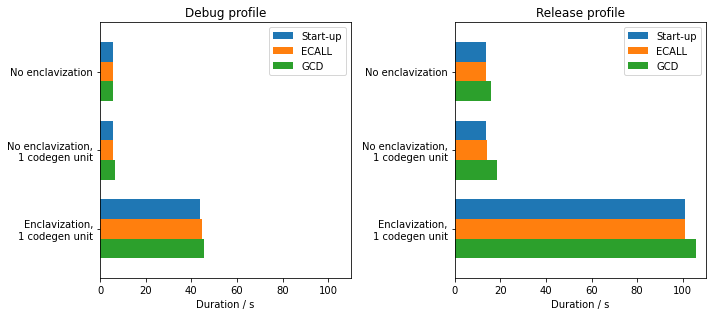

In [6]:
indexed_results_1 = indexed_results[indexed_results.index.get_level_values(0).str.contains('debug')]
indexed_results_2 = indexed_results[indexed_results.index.get_level_values(0).str.contains('release')]

fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))
indexed_results_1['duration'].plot(kind='barh', ax=ax[0], width=0.75)
indexed_results_2['duration'].plot(kind='barh', ax=ax[1], width=0.75)

for i in range(2):
    ax[i].set_xlim(0, 110)
    ax[i].set_xlabel('Duration / s')
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(['No enclavization', 'No enclavization,\n1 codegen unit', 'Enclavization,\n1 codegen unit'])
    ax[i].yaxis.get_label().set_visible(False)
    ax[i].legend(['Start-up', 'ECALL', 'GCD'], loc='upper right')

ax[0].set_title('Debug profile')
ax[1].set_title('Release profile')

fig.tight_layout()

In [7]:
fig.savefig('performance_build_micro.pdf', bbox_inches='tight', pad_inches=0)

## Start-up Runtime Performance

In [8]:
results = data[data['program'] == 'minimal_startup'].groupby(['enclaved']).mean()
results

,duration,size
enclaved,,
False,2.233374,NaN
True,82.758029,NaN


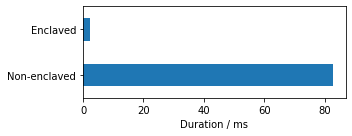

In [9]:
ax = results['duration'].plot(kind='barh', figsize=(5, 2))
fig = ax.get_figure()

ax.set_xlabel('Duration / ms')
ax.invert_yaxis()
ax.set_yticklabels(['Enclaved', 'Non-enclaved'])
ax.yaxis.get_label().set_visible(False)

fig.tight_layout()

In [10]:
fig.savefig('performance_run_minimal_startup.pdf', bbox_inches='tight', pad_inches=0)

## ECALL Runtime Performance

In [11]:
results = data[data['program'] == 'minimal_ecall'].groupby(['enclaved']).mean()
results['duration'] = results['duration'].mul(1000)
results

,duration,size
enclaved,,
False,0.00100,NaN
True,10.38266,NaN


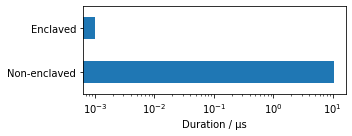

In [12]:
ax = results['duration'].plot(kind='barh', figsize=(5, 2))
fig = ax.get_figure()

ax = results['duration'].plot(kind='barh', log=True, figsize=(5, 2))
ax.set_xlabel('Duration / µs')
ax.invert_yaxis()
ax.set_yticklabels(['Enclaved', 'Non-enclaved'])
ax.yaxis.get_label().set_visible(False)

fig.tight_layout()

In [13]:
fig.savefig('performance_run_minimal_ecall.pdf', bbox_inches='tight', pad_inches=0)

## GCD Runtime Performance

In [14]:
results = data[data['program'] == 'gcd'].groupby(['enclaved', 'size']).mean()
results['duration'] = results['duration'].mul(10**6)
results = results.unstack()
results

duration                                                      \
size          1.0       2.0       3.0       4.0        5.0        6.0    
enclaved                                                                 
False        12.04     36.23     84.00    133.80     179.03     238.03   
True      19985.39  39883.63  64735.74  89583.05  109442.70  134236.65   

                                                      
size           7.0        8.0        9.0        11.0  
enclaved                                              
False        312.05     445.16     472.87     609.63  
True      159095.94  183941.64  203819.31  253660.43

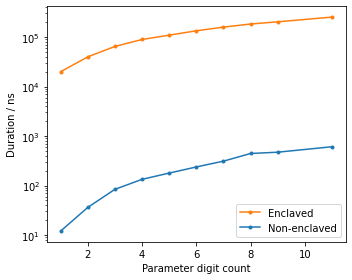

In [15]:
ax = results['duration'].T.plot(kind='line', style='.-', logy=True, figsize=(5, 4))
fig = ax.get_figure()

ax.set_xlabel('Parameter digit count')
ax.set_ylabel('Duration / ns')

# Swap legend order
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], ['Enclaved', 'Non-enclaved'], loc='lower right')

fig.tight_layout()

In [16]:
fig.savefig('performance_run_gcd.pdf', bbox_inches='tight', pad_inches=0)